<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Добрый день, Уважаемый ревьюер, предлагаю твоему вниманию свой проектпо подготовке прототипа модели машинного обучения.
В этом проекте я попытался построить моддель которая предкажет коэффициент восстановления золота из золотосодержащей руды и поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Хотел бы попросить строго не оценивать мою работу, так я не успел её сдать в срок и куратор дал мне дополнительно всего один день для сдачи. Если будут существенные ошибки, я постараюсь в самые короткие сроки их исправить... Очень волнуюсь, ведь если не получится сдать, то придётся переводиться в другую группу :-( Спасибо за понимание *-)

## Подготовка данных

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

Игнорируем предупреждения:

In [2]:
import warnings
warnings.filterwarnings('ignore')

Откроем файлы:

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Выведем первые строки датафреймов:

In [4]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Выведем основную информацию датафреймов:

In [7]:
for data in [data_train, data_test, data_full]:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
for data in [data_train, data_test, data_full]:
    print(data.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    4

In [9]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
 
data_train['rougher.output.recovery_test'] = (C * (F - T)) / (F * (C - T)) * 100

Найдем МАЕ:

In [10]:
mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_test'])

9.73512347450521e-15

In [11]:
data_train[['rougher.output.recovery', 'rougher.output.recovery_test']]

,rougher.output.recovery,rougher.output.recovery_test
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


MAE между нашими расчётами и значением признака идентичны...из этого следует вывод, что в тестовой выборке нет целевых признаков, скорее, потому, что тестовая выборка имитирует ситуацию реального применениия модели, и на начале техпроцесса мы попросту не знаем значения целевых признаков - их мы сможем узнать только по завершении техпроцесса... 

Заполним пропуски с помощью стратегии forward fill:

In [12]:
for data in [data_train, data_test, data_full]:
    data.fillna(method='ffill')

In [13]:
data_train.isna().sum().sum()

4100

Добавим в тестовую выборку целевые признаки:

In [14]:
data_test = pd.merge(data_test, data_full[['date','rougher.output.recovery','final.output.recovery']], how='left')

In [15]:
data_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Выполним анализ признаков, недоступных в тестовой выборке:

In [16]:
features_difference = set(data_full.columns) - set(data_test.columns)
display(features_difference)
len(features_difference)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

32

In [17]:
features_difference = set(data_train.columns) - set(data_test.columns)
display(features_difference)
len(features_difference)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery_test',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.out

33

На тестовой выборке отсутствуют целевые признаки, показатели доли металлов в концентрате и хвостах после каждой статии (этапа) очистки), а также расчетные коэффициенты

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

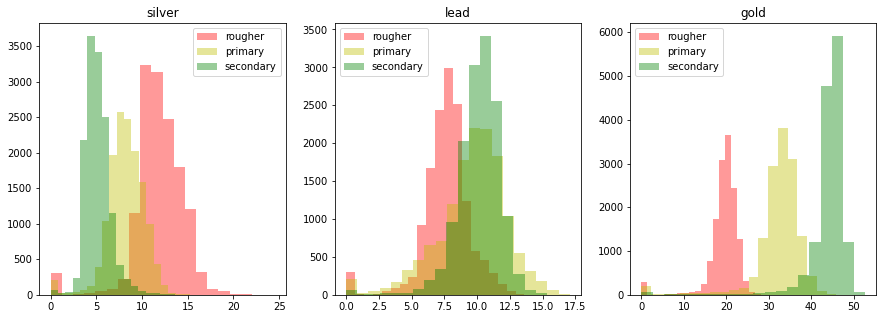

In [18]:
rougher_ag = data_train["rougher.output.concentrate_ag"]
rougher_au = data_train["rougher.output.concentrate_au"]
rougher_pb = data_train["rougher.output.concentrate_pb"]
primary_ag = data_train["primary_cleaner.output.concentrate_ag"]
primary_au = data_train["primary_cleaner.output.concentrate_au"]
primary_pb = data_train["primary_cleaner.output.concentrate_pb"]
secondary_ag = data_train["final.output.concentrate_ag"]
secondary_au = data_train["final.output.concentrate_au"]
secondary_pb = data_train["final.output.concentrate_pb"]
silver = [rougher_ag, primary_ag, secondary_ag]
lead = [rougher_pb, primary_pb, secondary_pb]
gold = [rougher_au, primary_au, secondary_au]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')
for metal, ax, name in zip([silver, lead, gold], axes, ["silver", "lead", "gold"]):
    for stage, color, label in zip(metal, ["r", "y", "g"], ["rougher", "primary", "secondary"]):
        ax.hist(stage, alpha=0.4, bins=20, color=color, label=label)
    ax.legend()
    ax.set_title(name)
plt.show();

Концентрация серебра после этапов очистки падает, свинца возрастает и золота возрастает...

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках:

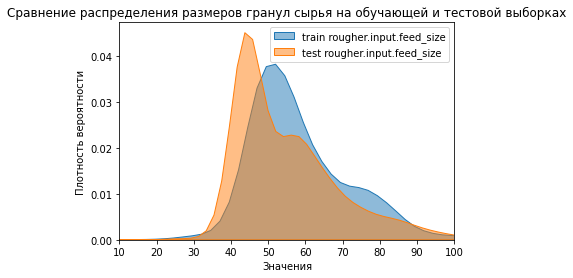

In [19]:
sns.kdeplot(data_train['rougher.input.feed_size'], label = 'train rougher.input.feed_size', alpha = 0.5, shade = True)
sns.kdeplot(data_test['rougher.input.feed_size'], label = 'test rougher.input.feed_size', alpha = 0.5, shade = True)
plt.xlim([10,100])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend(loc = 'upper right')
plt.title('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.show()

На первый взгляд распределения достаточно близки, хоть и не идеально совпадают. А значит можно сделать вывод о том что оценки моделей на двух множествах будут сравнимы...

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:

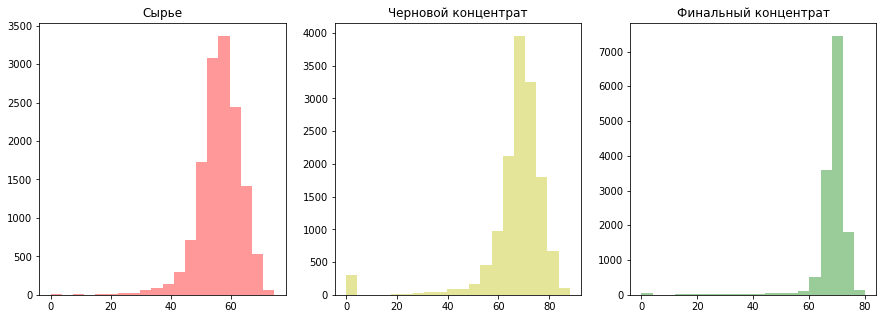

In [20]:
sum_concentrate = [data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] + \
                   data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_sol'], \
                   data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + \
                   data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_sol'], \
                   data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + \
                   data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_sol']
                  ]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')
for concentration, ax, name, color in zip(sum_concentrate, axes, ["Сырье", "Черновой концентрат", "Финальный концентрат"],["r", "y", "g"]):
    ax.hist(concentration, alpha=0.4, bins=20, color=color)
    ax.set_title(name)
plt.show()

Да дествительно есть аномальные значения...Скорее всего это связано со сбоем измерительного оборудования. Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования. удалим их ...

In [21]:
data_train_clean = data_train[data_train[['rougher.input.feed_ag','rougher.input.feed_pb', \
                                        'rougher.input.feed_au','rougher.input.feed_sol']].sum(axis=1) >1]
data_train_clean = data_train_clean[data_train_clean[['rougher.output.concentrate_ag','rougher.output.concentrate_pb', \
                                                    'rougher.output.concentrate_au','rougher.output.concentrate_sol']].sum(axis=1) > 1]
data_train_clean = data_train_clean[data_train_clean[['final.output.concentrate_ag','final.output.concentrate_pb', \
                                                    'final.output.concentrate_au','final.output.concentrate_sol']].sum(axis=1) > 1]


## Модель

Напишем функцию для вычисления итоговой sMAPE:

In [22]:
def smape(target, pred):
    smape = abs(target - pred) / ((abs(target) + abs(pred))/2) * 100
    smape = smape.fillna(value=0)
    smape = sum(smape)/len(smape)
    return smape

Обучим разные модели и оценим их качество кросс-валидацией:

Ограничим признаки обучающей выборки теми признаками, которые содержатся в тестовой выбороке и удалим столбец 'date' из обучающей выборки:

In [23]:
data_train_adjusted = data_train_clean[data_test.columns].drop('date',axis = 1)

Определим признаки для расчета эффективности обогащения финального концентрата:

In [24]:
features_final = list(set(data_train_adjusted.columns)- set(['rougher.output.recovery', 'final.output.recovery']))

Определим признаки для расчета эффективности обогащения чернового концентрата:

In [25]:
features_rougher = list(set([c for c in data_train_adjusted.columns if "rougher" in c]) - set(['rougher.output.recovery']))

Выполним стандартизацию обучающей выборки:

In [26]:
scaler = StandardScaler()
scaler.fit(data_train_adjusted[features_final])
data_train_adjusted[features_final] = scaler.transform(data_train_adjusted[features_final])

Удалим столбец 'date' из тестовой выборки:

In [27]:
data_test_adjusted = data_test.drop('date',axis = 1)

In [28]:
data_train_adjusted = data_train_adjusted.fillna(method='ffill')
data_test_adjusted = data_test_adjusted.fillna(method='ffill')

Сформируем список признаков для целей валидации, обучения и проверки моделей на тестовой выборке и список целевых признаков:

In [29]:
features = [features_rougher,features_final]
targets = ['rougher.output.recovery','final.output.recovery']

Проверим модели кросс-валидацией и выберем лучшую модель - отдлельно для расчета каждого из целевых показателей:

In [30]:
%%time

best_models = []
best_models_names = []
for features_set, targets_set, stage in zip([features_rougher,features_final],
                                            ['rougher.output.recovery','final.output.recovery'],
                                            ['"Флотация"','"Финальная стадия"']
                                           ):
    print (stage)
    X = data_train_adjusted[features_set]
    y = data_train_adjusted[targets_set]
    best_score = 10000
    for model,name in zip([DecisionTreeRegressor(), RandomForestRegressor(), LinearRegression()],
                          ['"Решающее дерево"','"Случайный лес"','"Линейная регрессия"']
                         ):
        scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(smape))
        final_score = sum(scores)/len(scores)
        print(f'Средняя оценка качества модели {name} по метрике sMAPE на стадии {stage}:{-final_score}')
        if final_score < best_score:
            best_score = final_score
            best_model = model
            best_model_name = name
    print()
    best_models.append(best_model)
    best_models_names.append(best_model_name)

"Флотация"
Средняя оценка качества модели "Решающее дерево" по метрике sMAPE на стадии "Флотация":-11.76644803338335
Средняя оценка качества модели "Случайный лес" по метрике sMAPE на стадии "Флотация":-6.555205484810149
Средняя оценка качества модели "Линейная регрессия" по метрике sMAPE на стадии "Флотация":-6.617061214692112

"Финальная стадия"
Средняя оценка качества модели "Решающее дерево" по метрике sMAPE на стадии "Финальная стадия":-15.376202986694334
Средняя оценка качества модели "Случайный лес" по метрике sMAPE на стадии "Финальная стадия":-9.727462886633491
Средняя оценка качества модели "Линейная регрессия" по метрике sMAPE на стадии "Финальная стадия":-11.000182432715352

CPU times: user 5min 40s, sys: 2.54 s, total: 5min 43s
Wall time: 5min 44s


In [32]:
parametrs = { 'n_estimators': range (10, 41, 10), # число деревьев в лесу
              'max_depth': range (1,11, 2)} # глубина

In [38]:
%%time

grid = GridSearchCV(RandomForestRegressor(), parametrs, cv=5, scoring = make_scorer(smape, greater_is_better = False))
for i in range (0,2):
    grid.fit(data_train_adjusted[features[i]],data_train_adjusted[targets[i]])
    grid.best_params_

CPU times: user 8min 45s, sys: 1.24 s, total: 8min 47s
Wall time: 8min 47s


In [39]:
print('Лучшие параметры:', grid.best_params_, '\n')

Лучшие параметры: {'max_depth': 3, 'n_estimators': 20} 



Обучим лучшую модель на обучащей выборке:

In [42]:
%%time

for i in range (0,2):
    best_models[i] = best_models[i].fit(data_train_adjusted[features[i]],data_train_adjusted[targets[i]])

CPU times: user 1min 25s, sys: 208 ms, total: 1min 25s
Wall time: 1min 25s


Расчитаем итоговую метрику sMAPE на тестовой выборке:

Выполним стандартизацию тестовой выборки:

In [43]:
scaler.fit(data_test_adjusted[features_final])
data_test_adjusted[features_final] = scaler.transform(data_test_adjusted[features_final])

In [44]:
final_smape = 0.25 * smape(data_test_adjusted['rougher.output.recovery'],
                           best_models[0].predict(data_test_adjusted[features_rougher]))\
              + 0.75 * smape(data_test_adjusted['final.output.recovery'],
                           best_models[1].predict(data_test_adjusted[features_final]))
print('Итоговая SMAPE на тестовой выборке:', final_smape) 

Итоговая SMAPE на тестовой выборке: 9.911455456987904


Проведём сравнение с констатной моделью (DummyRegressor).

In [45]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regressor_models = []
for i in range (0,2):
    dummy_regressor_models.append(dummy_regr)
    dummy_regressor_models[i] = dummy_regressor_models[i].fit(data_train_adjusted[features[i]],data_train_adjusted[targets[i]])
final_smape_dummy_regressor = 0.25 * smape(data_test_adjusted['rougher.output.recovery'],
                                     dummy_regressor_models[0].predict(data_test_adjusted[features_rougher]))\
                            + 0.75 * smape(data_test_adjusted['final.output.recovery'],
                                     dummy_regressor_models[1].predict(data_test_adjusted[features_final]))
print('Итоговая SMAPE на тестовой выборке с помощью констатной модели DummyRegressor:', final_smape_dummy_regressor)    

Итоговая SMAPE на тестовой выборке с помощью констатной модели DummyRegressor: 14.872741583698865


In [46]:
for i in range (0,2):
    print (best_models_names[i],best_models[i])

"Случайный лес" RandomForestRegressor()
"Случайный лес" RandomForestRegressor()


Расчет sMAPE для показателя rougher.output.recovery обученной моделью "Линейная регрессия":

In [47]:
print(smape(data_test_adjusted['rougher.output.recovery'],best_models[0].predict(data_test_adjusted[features_rougher])))

8.172254524111137


Расчет sMAPE для показателя rougher.output.recovery моделью "Линейная регрессия" (повторное обучение):

In [48]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(data_train_adjusted[features_rougher],data_train_adjusted['rougher.output.recovery'])
print(smape(data_test_adjusted['rougher.output.recovery'],model_linear_regression.predict(data_test_adjusted[features_rougher])))

8.810953074241121


Расчет sMAPE для показателя rougher.output.recovery моделью "Случайный лес":

In [49]:
model_random_forest_regressor = RandomForestRegressor()
model_random_forest_regressor.fit(data_train_adjusted[features_rougher],data_train_adjusted['rougher.output.recovery'])
print(smape(data_test_adjusted['rougher.output.recovery'], model_random_forest_regressor.predict(data_test_adjusted[features_rougher])))

8.127392611193423


Расчет sMAPE для показателя rougher.output.recovery константной моделью "DummyRegressor":

In [50]:
print(smape(data_test_adjusted['rougher.output.recovery'],dummy_regressor_models[0].predict(data_test_adjusted[features_rougher])))

29.254177819648532


Расчет sMAPE для показателя final.output.recovery обученной моделью "Случайный лес":

In [51]:
print(smape(data_test_adjusted['final.output.recovery'],best_models[1].predict(data_test_adjusted[features_final])))

10.491189101280158


Расчет sMAPE для показателя rougher.output.recovery константной моделью "DummyRegressor":

In [52]:
print(smape(data_test_adjusted['final.output.recovery'],dummy_regressor_models[1].predict(data_test_adjusted[features_final])))

10.078929505048976


После предобработки данных и подготовки обучающей и тестовых выборок была проведена кросс-валидация моделей "Решающее дерево", "Случайный лес" и "Линейная регрессия" по метрике sMPAE. Для показателя эффективности обогащения чернового концентрата (стадия "Флотация") наименьшее значение sMAPE показала модель "Линейная регрессия". Для показателя эффективности обогащения финального концентрата ("Финальная стадия") наименьшее значение sMAPE показала модель "Случайный лес". Именно эти модели были выбраны для обучения на тестовой выборке и расчета итоговой метрике sMAPE на тестовой выборке.
 
Итоговый показатель sMAPE на тестовой выборке получился значительно хуже, чем отдельные показатели sMAPE на обучающей выборке для показателей эффективности обогащения чернового и финального концентратов.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке